In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [168]:
data = pd.read_excel("D:\WidiPythonEnv\Machine-Learning/5210411135\data\Mall_Customers.xlsx")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [170]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [171]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [172]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Deleting Column or Row
labels = index -> deleting row
labels =  column name -> deleting column

axis = 0 -> row
axis = 1 -> column

inplace = True -> alter

In [173]:
data.drop(labels='CustomerID', axis=1, inplace=True)
data.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


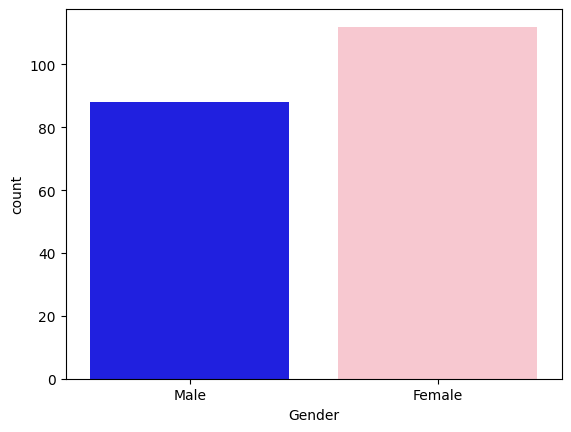

In [174]:
sns.countplot(data=data, x='Gender', palette=['blue', 'pink'])
plt.show()

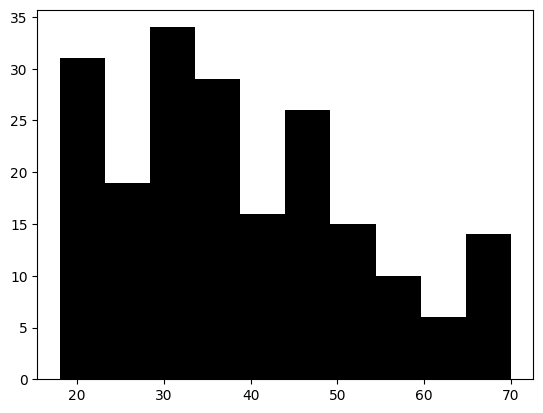

In [175]:
plt.hist(data['Age'], color='black')
plt.show()

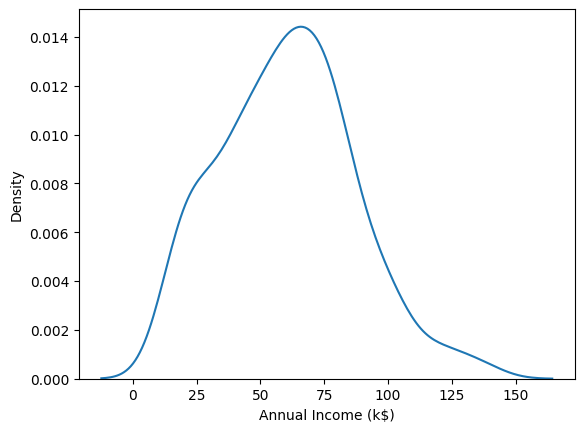

In [176]:
sns.kdeplot(data=data, x='Annual Income (k$)')
plt.show()

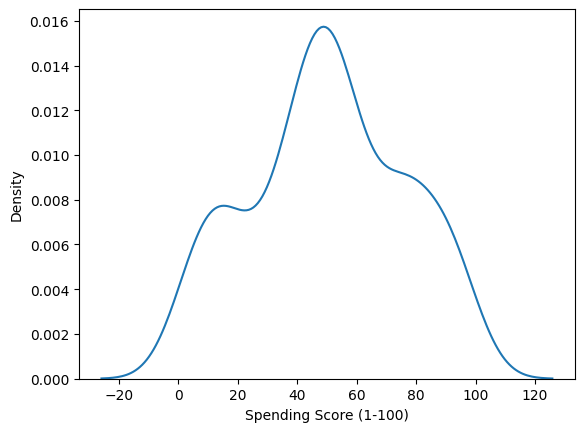

In [177]:
sns.kdeplot(data=data, x='Spending Score (1-100)')
plt.show()

In [178]:
lb_y = data.iloc[:,0].values
ft_x = data.iloc[:,1:].values

# split
x_train, x_test, y_train, y_test = train_test_split(ft_x,
                                                    lb_y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=False)

dimensi = f'dimensi awal\t: {data.shape}\ndimensi x_train\t: {x_train.shape}\ndimensi x_test\t: {x_test.shape}\ndimensi y_train\t: {y_train.shape}\ndimensi y_test\t: {y_test.shape}\n'
print(dimensi)

dimensi awal	: (200, 4)
dimensi x_train	: (160, 3)
dimensi x_test	: (40, 3)
dimensi y_train	: (160,)
dimensi y_test	: (40,)



In [179]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

y_predict = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_predict)

# print(y_test)
# print(y_predict)
print(accuracy)

0.6


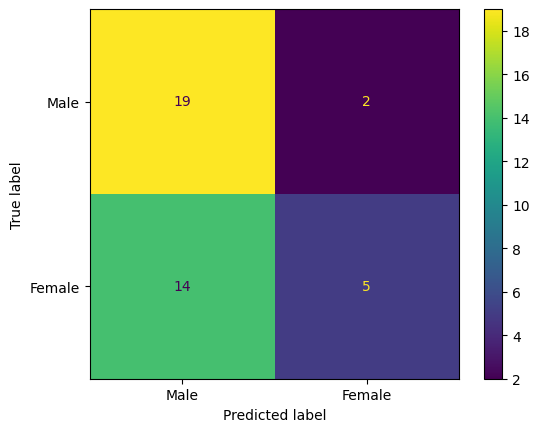

In [180]:
cm = metrics.confusion_matrix(y_test,y_predict)
disp_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Male','Female'])
disp_cm.plot()
plt.show()